In [1]:
import optuna

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Rk -- Rank <br>
G -- Games <br>
MP -- Minutes Played <br>
FG -- Field Goals <br>
FGA -- Field Goal Attempts <br>
FG% -- Field Goal Percentage <br>
3P -- 3-Point Field Goals <br>
3PA -- 3-Point Field Goal Attempts <br>
3P% -- 3-Point Field Goal Percentage <br>
2P -- 2-Point Field Goals <br>
2PA -- 2-point Field Goal Attempts <br>
2P% -- 2-Point Field Goal Percentage <br>
FT -- Free Throws <br>
FTA -- Free Throw Attempts <br>
FT% -- Free Throw Percentage <br>
ORB -- Offensive Rebounds <br>
DRB -- Defensive Rebounds <br>
TRB -- Total Rebounds <br>
AST -- Assists <br>
STL -- Steals <br>
BLK -- Blocks <br>
TOV -- Turnovers <br>
PF -- Personal Fouls <br>
PTS -- Points <br>

In [2]:
Teams = pd.read_csv('totals_Teams.csv')
Standings = pd.read_csv('Standings.csv')

In [3]:
Teams

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Minneapolis Lakers,68,Not Found,2139,5832,.367,Not Found,Not Found,Not Found,2139,...,Not Found,Not Found,Not Found,1406,Not Found,Not Found,Not Found,1672,5717,1950
1,Rochester Royals,68,Not Found,1956,5247,.373,Not Found,Not Found,Not Found,1956,...,Not Found,Not Found,Not Found,1383,Not Found,Not Found,Not Found,1585,5602,1950
2,Anderson Packers,64,Not Found,1943,6254,.311,Not Found,Not Found,Not Found,1943,...,Not Found,Not Found,Not Found,1240,Not Found,Not Found,Not Found,1806,5589,1950
3,Indianapolis Olympians,64,Not Found,1982,5283,.375,Not Found,Not Found,Not Found,1982,...,Not Found,Not Found,Not Found,1342,Not Found,Not Found,Not Found,1676,5493,1950
4,New York Knicks,68,Not Found,1889,5351,.353,Not Found,Not Found,Not Found,1889,...,Not Found,Not Found,Not Found,1308,Not Found,Not Found,Not Found,1718,5488,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,New York Knicks,66,15965,2638,5896,.447,631,1872,.337,2007,...,795,2274,3069,1456,504,313,946,1464,6983,2020
1509,Cleveland Cavaliers,65,15725,2619,5715,.458,727,2070,.351,1892,...,704,2172,2876,1500,447,211,1073,1188,6948,2020
1510,Chicago Bulls,65,15675,2573,5762,.447,793,2282,.348,1780,...,680,2041,2721,1510,652,265,1005,1417,6945,2020
1511,Golden State Warriors,65,15725,2510,5730,.438,678,2032,.334,1832,...,647,2138,2785,1663,534,299,969,1304,6912,2020


In [4]:
# Replace "Not Found" with NaN
Teams.replace('Not Found', pd.NaT, inplace=True)

In [5]:
# Calculate missing data per column
Teams.isnull().sum()

Team        0
G           1
MP        141
FG          1
FGA         1
FG%         1
3P        379
3PA       379
3P%       379
2P          1
2PA         1
2P%         1
FT          1
FTA         1
FT%         1
ORB       260
DRB       260
TRB        18
AST         1
STL       260
BLK       260
TOV       260
PF          1
PTS         1
Season      0
dtype: int64

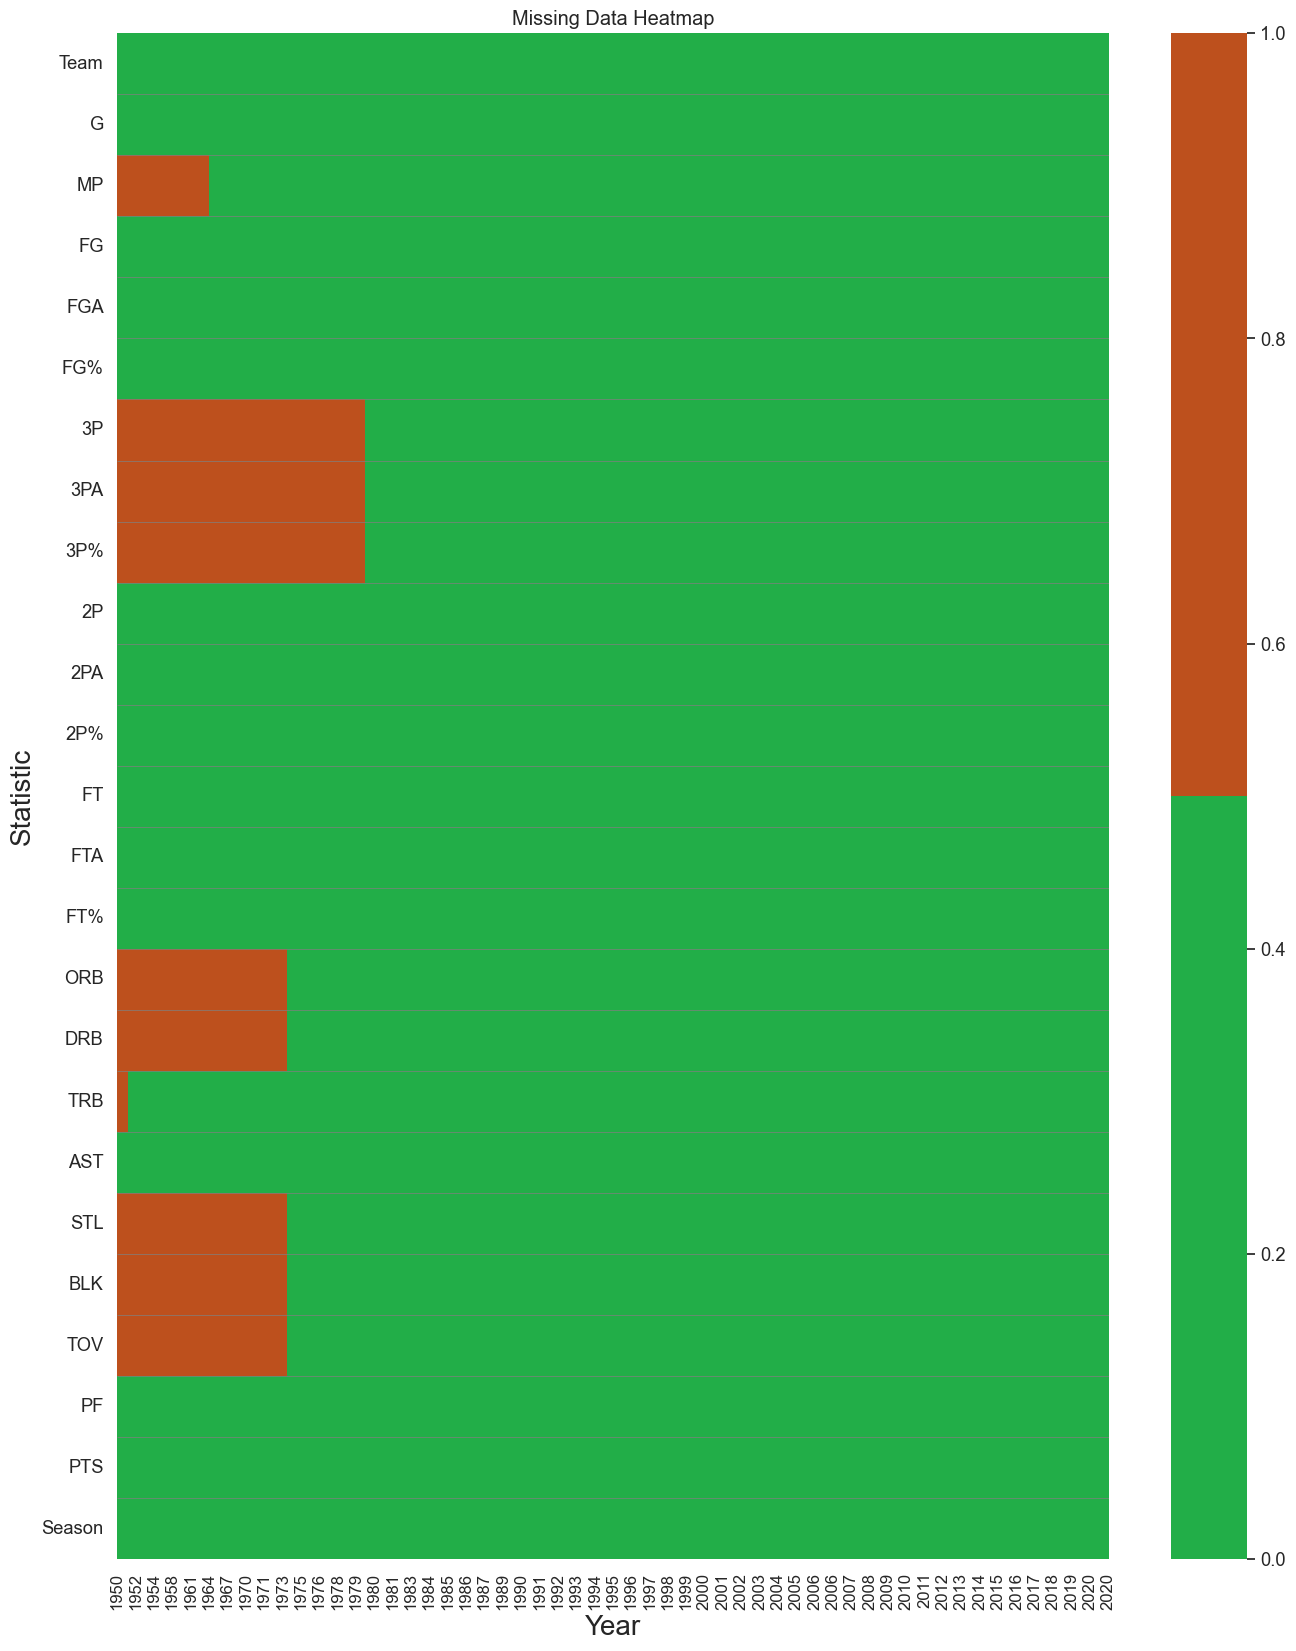

In [6]:
# Create custom colormap with different color for missing values
cmap = sns.color_palette(['#22AE48', '#BD501D'], as_cmap=True)

sns.set(font_scale=1.2)
plt.figure(figsize=(16, 14))
ax = sns.heatmap(Teams.T.isnull(), cmap=cmap, cbar=True)
ax.set_xticks(Teams['Season'][::28].index)
ax.set_xticklabels(Teams['Season'][::28], rotation=90, ha='center', fontsize=12)
ax.hlines(range(1, len(Teams.columns)), *ax.get_xlim(), color='gray', linewidth=0.5)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Statistic', fontsize=20)
plt.title('Missing Data Heatmap')

# Add margin to the top of the plot
plt.subplots_adjust(top=1.2)

plt.show()


In [7]:
# Note the 1979-1980 season was the first season to introduce the 3 pointer, this project will use 1980 as the cutoff year.
Teams.isna().sum()

Team        0
G           1
MP        141
FG          1
FGA         1
FG%         1
3P        379
3PA       379
3P%       379
2P          1
2PA         1
2P%         1
FT          1
FTA         1
FT%         1
ORB       260
DRB       260
TRB        18
AST         1
STL       260
BLK       260
TOV       260
PF          1
PTS         1
Season      0
dtype: int64

In [8]:
cleanTeams = Teams.copy()

In [9]:
cleanTeams = cleanTeams.loc[cleanTeams['Season'] > 1979]

In [10]:
cleanTeams.isna().sum()

Team      0
G         0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Season    0
dtype: int64

In [11]:
cleanTeams.T

,379,380,381,382,383,384,385,386,387,388,...,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512
Team,San Antonio Spurs,Los Angeles Lakers,Cleveland Cavaliers,New York Knicks,Boston Celtics,Indiana Pacers,Phoenix Suns,Houston Rockets,Milwaukee Bucks,Philadelphia 76ers,...,Sacramento Kings,Orlando Magic,Atlanta Hawks,Minnesota Timberwolves,Detroit Pistons,New York Knicks,Cleveland Cavaliers,Chicago Bulls,Golden State Warriors,Charlotte Hornets
G,82,82,82,82,82,82,82,82,82,82,...,72,73,67,64,66,66,65,65,65,65
MP,19755,19880,19930,19780,19880,19855,19755,19930,19805,19855,...,17455,17570,16280,15560,15965,15965,15725,15675,15725,15750
FG,3856,3898,3811,3802,3617,3639,3570,3599,3685,3523,...,2943,2871,2723,2586,2595,2638,2619,2573,2510,2425
FGA,7738,7368,8041,7672,7387,7689,7235,7496,7553,7156,...,6364,6468,6067,5865,5658,5896,5715,5762,5730,5586
FG%,.498,.529,.474,.496,.490,.473,.493,.480,.488,.492,...,.462,.444,.449,.441,.459,.447,.458,.447,.438,.434
3P,52,20,36,42,162,88,68,104,50,27,...,914,807,805,853,791,631,727,793,678,785
3PA,206,100,187,191,422,314,280,379,155,125,...,2511,2354,2416,2540,2157,1872,2070,2282,2032,2231
3P%,.252,.200,.193,.220,.384,.280,.243,.274,.323,.216,...,.364,.343,.333,.336,.367,.337,.351,.348,.334,.352
2P,3804,3878,3775,3760,3455,3551,3502,3495,3635,3496,...,2029,2064,1918,1733,1804,2007,1892,1780,1832,1640


In [12]:
Standings = Standings.rename(columns={'Year': 'Season'})

In [13]:
modelDf = pd.merge(cleanTeams, Standings, on=['Season', 'Team'])

In [14]:
modelDf.T

,0,1,2,3,4,5,6,7,8,9,...,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133
Team,San Antonio Spurs,Los Angeles Lakers,Cleveland Cavaliers,New York Knicks,Boston Celtics,Indiana Pacers,Phoenix Suns,Houston Rockets,Milwaukee Bucks,Philadelphia 76ers,...,Sacramento Kings,Orlando Magic,Atlanta Hawks,Minnesota Timberwolves,Detroit Pistons,New York Knicks,Cleveland Cavaliers,Chicago Bulls,Golden State Warriors,Charlotte Hornets
G,82,82,82,82,82,82,82,82,82,82,...,72,73,67,64,66,66,65,65,65,65
MP,19755,19880,19930,19780,19880,19855,19755,19930,19805,19855,...,17455,17570,16280,15560,15965,15965,15725,15675,15725,15750
FG,3856,3898,3811,3802,3617,3639,3570,3599,3685,3523,...,2943,2871,2723,2586,2595,2638,2619,2573,2510,2425
FGA,7738,7368,8041,7672,7387,7689,7235,7496,7553,7156,...,6364,6468,6067,5865,5658,5896,5715,5762,5730,5586
FG%,.498,.529,.474,.496,.490,.473,.493,.480,.488,.492,...,.462,.444,.449,.441,.459,.447,.458,.447,.438,.434
3P,52,20,36,42,162,88,68,104,50,27,...,914,807,805,853,791,631,727,793,678,785
3PA,206,100,187,191,422,314,280,379,155,125,...,2511,2354,2416,2540,2157,1872,2070,2282,2032,2231
3P%,.252,.200,.193,.220,.384,.280,.243,.274,.323,.216,...,.364,.343,.333,.336,.367,.337,.351,.348,.334,.352
2P,3804,3878,3775,3760,3455,3551,3502,3495,3635,3496,...,2029,2064,1918,1733,1804,2007,1892,1780,1832,1640


In [15]:
modelDf = modelDf.reindex(columns=['Team', 'Season', 'W/L%'] + list(modelDf.columns.drop(['Team', 'Season', 'W/L%'])))

In [16]:
modelDf = modelDf.sort_values(by=['Season', 'W/L%'], ascending=[True, False])

In [17]:
modelDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 4 to 1132
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    1134 non-null   object 
 1   Season  1134 non-null   int64  
 2   W/L%    1134 non-null   float64
 3   G       1134 non-null   object 
 4   MP      1134 non-null   object 
 5   FG      1134 non-null   object 
 6   FGA     1134 non-null   object 
 7   FG%     1134 non-null   object 
 8   3P      1134 non-null   object 
 9   3PA     1134 non-null   object 
 10  3P%     1134 non-null   object 
 11  2P      1134 non-null   object 
 12  2PA     1134 non-null   object 
 13  2P%     1134 non-null   object 
 14  FT      1134 non-null   object 
 15  FTA     1134 non-null   object 
 16  FT%     1134 non-null   object 
 17  ORB     1134 non-null   object 
 18  DRB     1134 non-null   object 
 19  TRB     1134 non-null   object 
 20  AST     1134 non-null   object 
 21  STL     1134 non-null   object 
 22  

In [18]:
modelDf = modelDf.drop('Team', axis=1)

In [19]:
modelDf = modelDf.astype('float64')

In [20]:
# Add 'missed' columns for 3P, 2P, FG, and FT
modelDf['3P_Missed'] = modelDf['3PA'] - modelDf['3P']
modelDf['2P_Missed'] = modelDf['2PA'] - modelDf['2P']
modelDf['FG_Missed'] = modelDf['FGA'] - modelDf['FG']
modelDf['FT_Missed'] = modelDf['FTA'] - modelDf['FT']

In [21]:
modelDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 4 to 1132
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     1134 non-null   float64
 1   W/L%       1134 non-null   float64
 2   G          1134 non-null   float64
 3   MP         1134 non-null   float64
 4   FG         1134 non-null   float64
 5   FGA        1134 non-null   float64
 6   FG%        1134 non-null   float64
 7   3P         1134 non-null   float64
 8   3PA        1134 non-null   float64
 9   3P%        1134 non-null   float64
 10  2P         1134 non-null   float64
 11  2PA        1134 non-null   float64
 12  2P%        1134 non-null   float64
 13  FT         1134 non-null   float64
 14  FTA        1134 non-null   float64
 15  FT%        1134 non-null   float64
 16  ORB        1134 non-null   float64
 17  DRB        1134 non-null   float64
 18  TRB        1134 non-null   float64
 19  AST        1134 non-null   float64
 20  STL     

In [22]:
modelDf.loc[modelDf['G'] < 82].groupby('Season').count()['G']

Season
1999.0    29
2012.0    30
2013.0     2
2020.0    30
Name: G, dtype: int64

In [23]:
modelDf = modelDf.reset_index(drop=True)

## Scaling Data

In [24]:
modelDf.columns

Index(['Season', 'W/L%', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'GB', 'PS/G', 'PA/G', 'SRS',
       '3P_Missed', '2P_Missed', 'FG_Missed', 'FT_Missed'],
      dtype='object')

In [25]:
# define the columns that need to be scaled
cols_to_scale = modelDf.columns

# create a scaler object
scaler = StandardScaler()

# fit and transform the scaler to the columns of the DataFrame
scaledDf = scaler.fit_transform(modelDf[cols_to_scale])

# create a DataFrame from the scaled values
scaledDf = pd.DataFrame(scaledDf, columns=cols_to_scale)


In [26]:
scaledDf.T

,0,1,2,3,4,5,6,7,8,9,...,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133
Season,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,-1.818981,...,1.633566,1.633566,1.633566,1.633566,1.633566,1.633566,1.633566,1.633566,1.633566,1.633566
W/L%,1.579464,1.501827,1.424189,1.184807,1.107169,0.712511,0.634873,0.473128,0.000833,0.000833,...,-0.536161,-0.943758,-0.989047,-1.047275,-1.176671,-1.273718,-1.299597,-1.312537,-1.344886,-1.739543
G,0.263816,0.263816,0.263816,0.263816,0.263816,0.263816,0.263816,0.263816,0.263816,0.263816,...,-1.443763,-2.639068,-1.443763,-2.639068,-2.468310,-2.468310,-2.297552,-2.809826,-2.639068,-2.639068
MP,0.305426,0.305426,0.287758,0.270090,0.217085,0.234753,0.252422,0.252422,0.217085,0.340763,...,-1.426058,-2.613362,-1.479063,-2.666367,-2.461415,-2.461415,-2.238796,-2.747640,-2.631030,-2.631030
FG,1.320663,2.077447,1.067504,1.150993,1.194084,0.361891,1.503800,1.226402,1.964334,1.272186,...,-0.165973,-1.889609,-0.367961,-1.491018,-1.315961,-1.431768,-1.087041,-1.456006,-1.367131,-1.660688
FGA,0.976472,0.947015,0.618340,1.252436,0.740818,0.418344,1.233831,1.134609,1.520648,1.145461,...,-0.246760,-1.815721,-0.330479,-1.542858,-1.335111,-1.704096,-1.069999,-1.383172,-1.615725,-1.592470
FG%,1.322500,3.160732,1.416768,0.379817,1.463902,0.097012,1.228232,0.756890,1.699573,0.851158,...,0.144146,-1.317013,-0.232928,-0.704269,-0.704269,-0.138659,-0.610001,-0.987074,-0.185793,-1.128477
3P,-0.957600,-1.504156,-1.477213,-1.354045,-1.319404,-1.531099,-1.388686,-1.484911,-1.380988,-1.180841,...,2.198568,1.440318,1.744388,1.471110,0.847574,1.463412,1.517298,1.702049,1.217077,1.028477
3PA,-1.070886,-1.532177,-1.496362,-1.404677,-1.274313,-1.567991,-1.453385,-1.512121,-1.380323,-1.132487,...,2.129494,1.520648,1.683962,1.593709,1.006352,1.414637,1.785675,1.963315,1.290003,1.235565
3P%,1.082161,-2.818263,-2.479096,-0.444092,-1.906751,-3.390608,-0.210914,-2.415502,-1.715969,-1.249614,...,0.785390,0.403827,0.742994,0.319035,0.085857,0.721796,0.001066,0.064659,0.382629,0.022263


## EDA

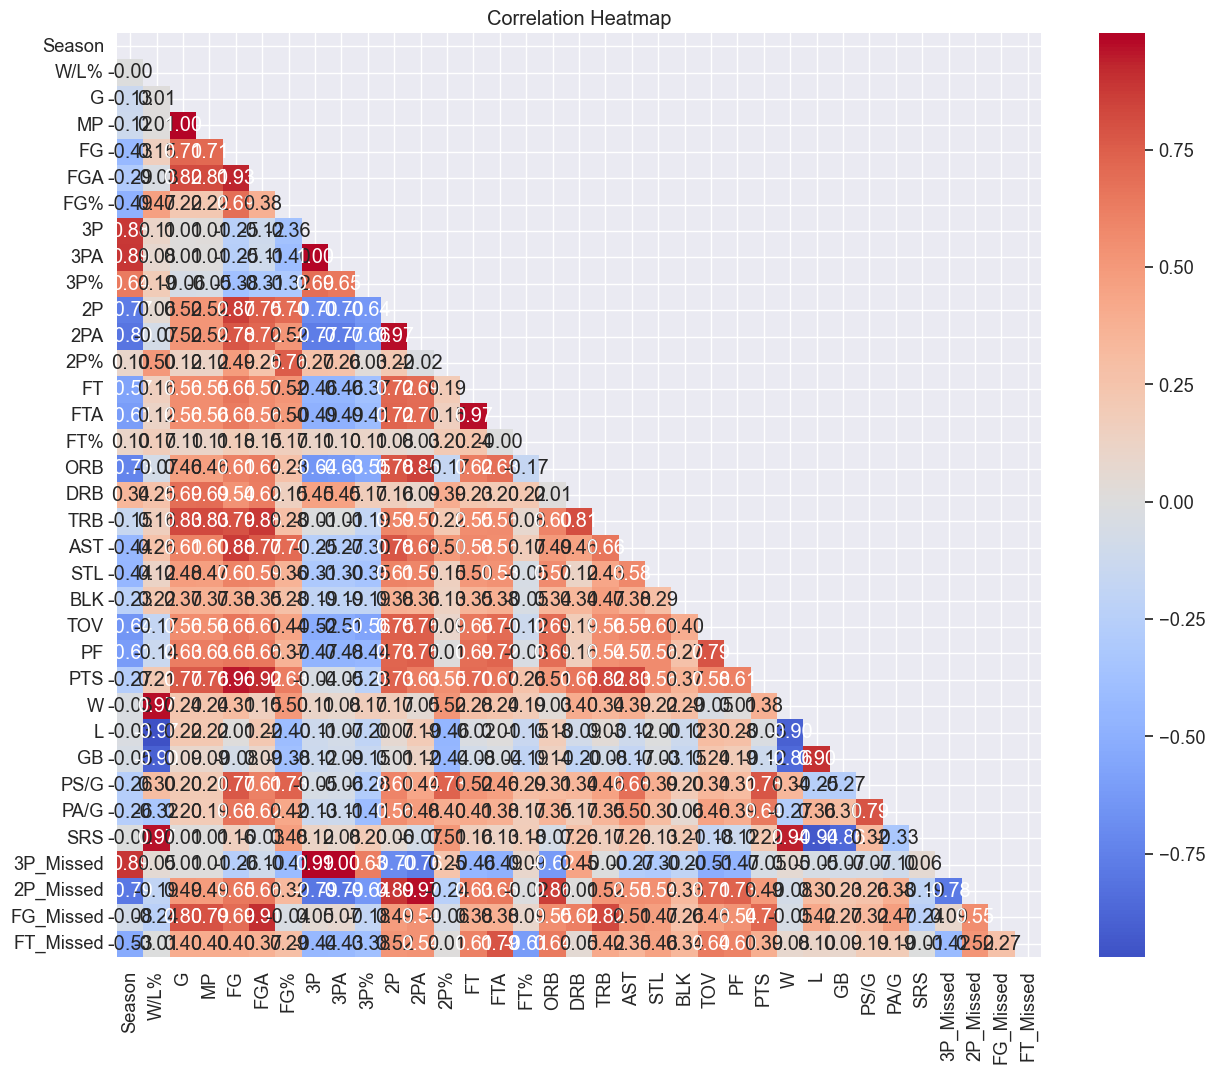

In [27]:
# Set the plot size
plt.figure(figsize=(15, 12))

# Generate a correlation matrix
corr_matrix = scaledDf.corr()

# Customize the heatmap
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, center=0, fmt='.2f', square=True)

# Add a title
plt.title('Correlation Heatmap')


# Rotate the x and y ticks to be perpendicular to their axis
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

## Model 1: Predicting Wins using Ordinary Least Squares

In [28]:
# Define the target variable and the predictors
target = scaledDf['W']
predictors = scaledDf[['3P', '3P_Missed', '2P', '2P_Missed', 'FT', 'FT_Missed', 'TRB', 'PF', 'STL', 'BLK', 'TOV']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1)

In [29]:
# Add a constant term to the predictors
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the OLS model
model1 = sm.OLS(y_train, X_train).fit()

In [30]:
# Fit the model and make predictions on the test set
y_pred = model1.predict(X_test)

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     337.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:00:24   Log-Likelihood:                -657.12
No. Observations:                1020   AIC:                             1338.
Df Residuals:                    1008   BIC:                             1397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.015      0.036      0.971      -0.028       0.029
3P             1.2371      0.105     11.798      0.000       1.031       1.443
3P_Missed     -2.5657      0.101    -25.432      0.000      -2.764      -2.368
2P             0.2359      0.043      5.544      0.000       0.152       0.319
2P_Missed     -1.8767      0.053    -35.311      0.000      -1.981      -1.772
FT             0.1225      0.024      5.036      0.000       0.075       0.170
FT_Missed     -0.0664      0.022     -3.074      0.002      -0.109      -0.024
TRB            1.2330      0.038     32.138      0.000       1.158       1.308
PF             0.1042      0.029      3.553      0.000       0.047       0.162
STL            0.4764      0.021     22.896      0.000       0.436       0.517
BLK            0.0445      0.018      2.529      0.012       0.010       0.079
TOV           -0.6579      0.029    -22.715      0.000      -0.715      -0.601
==============================================================================
Omnibus:                        3.663   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.712
Skew:                           0.145   Prob(JB):                        0.156
Kurtosis:                       2.942   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Removing high p-value features
# Get the p-values of the coefficients
p_values = model1.pvalues

# Filter the features based on p-values
significant_features = p_values[p_values <= 0.05].index

# Drop the 'const' column if it exists
if 'const' in significant_features:
    significant_features = significant_features.drop('const')

# Create a new X matrix with only the significant features
X_filtered = scaledDf[significant_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, target, test_size=0.15)


X_train = pd.DataFrame(X_train, columns=X_filtered.columns)
X_test = pd.DataFrame(X_test, columns=X_filtered.columns)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


# Print the resulting DataFrame
print(X_filtered.columns)

Index(['3P', '3P_Missed', '2P', '2P_Missed', 'FT', 'FT_Missed', 'TRB', 'PF',
       'STL', 'BLK', 'TOV'],
      dtype='object')


In [33]:
# Add a constant term to the predictors
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the OLS model
model2 = sm.OLS(y_train, X_train).fit()

In [34]:
# Fit the model and make predictions on the test set
y_pred = model2.predict(X_test)

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     326.8
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          6.14e-314
Time:                        15:00:24   Log-Likelihood:                -622.29
No. Observations:                 963   AIC:                             1269.
Df Residuals:                     951   BIC:                             1327.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.015     -0.277      0.782      -0.034       0.025
3P             1.2852      0.107     12.040      0.000       1.076       1.495
3P_Missed     -2.6080      0.103    -25.371      0.000      -2.810      -2.406
2P             0.2429      0.044      5.536      0.000       0.157       0.329
2P_Missed     -1.8704      0.054    -34.373      0.000      -1.977      -1.764
FT             0.1310      0.026      5.124      0.000       0.081       0.181
FT_Missed     -0.0630      0.022     -2.823      0.005      -0.107      -0.019
TRB            1.2165      0.039     31.045      0.000       1.140       1.293
PF             0.1039      0.030      3.488      0.001       0.045       0.162
STL            0.4738      0.021     22.428      0.000       0.432       0.515
BLK            0.0514      0.018      2.823      0.005       0.016       0.087
TOV           -0.6577      0.029    -22.312      0.000      -0.716      -0.600
==============================================================================
Omnibus:                        4.749   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.812
Skew:                           0.170   Prob(JB):                       0.0902
Kurtosis:                       2.937   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

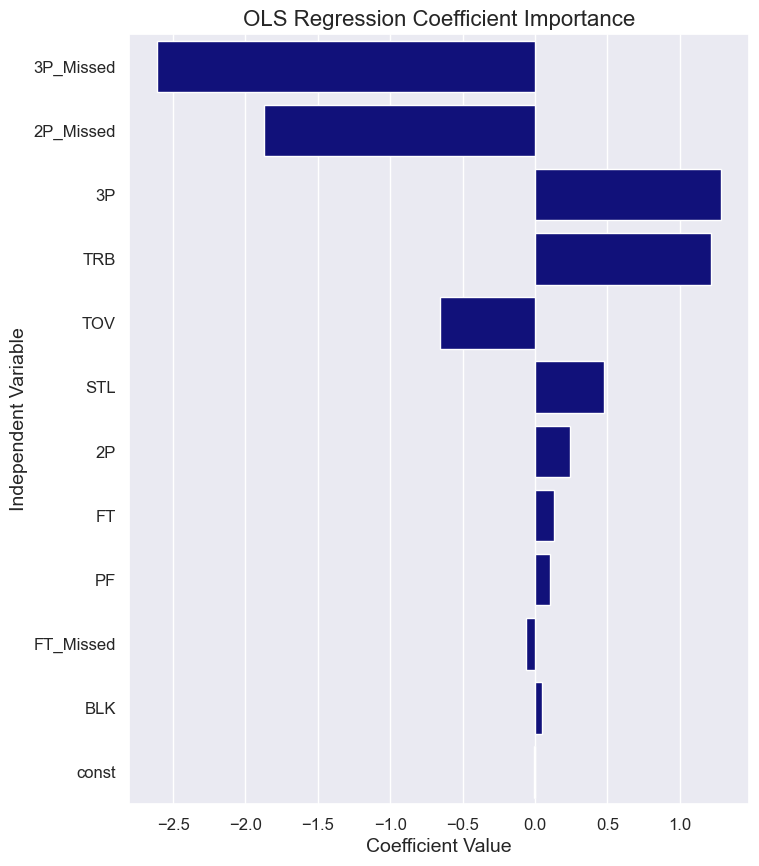

In [36]:
# get the coefficients and their names from the model
coef = model2.params.values
coef_names = model2.params.index.tolist()

# create a DataFrame of the coefficients and their names
coef_df = pd.DataFrame({'coef': coef, 'coef_name': coef_names})

# sort the coefficients in descending order by absolute value
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

# create a bar chart of the coefficients using seaborn
plt.figure(figsize=(8, 10))
sns.barplot(x='coef', y='coef_name', data=coef_df, color='darkblue')

# add axis labels and a title
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Independent Variable', fontsize=14)
plt.title('OLS Regression Coefficient Importance', fontsize=16)

# adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the plot
plt.show()

In [37]:
# create a new DataFrame containing only the features with coefficients >= 0.05
significant_features = model2.params[abs(model2.params) >= 0.05]
significant_cols = list(significant_features.index)
X_filtered = predictors[significant_cols]

# fit the new OLS regression model using only the significant features
model3 = sm.OLS(target, X_filtered).fit()

# print the summary statistics of the new model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      W   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              384.3
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:00:25   Log-Likelihood:                         -723.90
No. Observations:                1134   AIC:                                      1470.
Df Residuals:                    1123   BIC:                                      1525.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3P             1.2552      0.098     12.753      0.000       1.062       1.448
3P_Missed     -2.5875      0.095    -27.206      0.000      -2.774      -2.401
2P             0.2474      0.040      6.164      0.000       0.169       0.326
2P_Missed     -1.8781      0.049    -38.012      0.000      -1.975      -1.781
FT             0.1242      0.023      5.387      0.000       0.079       0.170
FT_Missed     -0.0767      0.020     -3.761      0.000      -0.117      -0.037
TRB            1.2244      0.036     34.282      0.000       1.154       1.294
PF             0.1120      0.027      4.083      0.000       0.058       0.166
STL            0.4803      0.019     24.639      0.000       0.442       0.519
BLK            0.0472      0.017      2.831      0.005       0.014       0.080
TOV           -0.6682      0.027    -24.815      0.000      -0.721      -0.615
==============================================================================
Omnibus:                        4.572   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.634
Skew:                           0.153   Prob(JB):                       0.0986
Kurtosis:                       2.938   Cond. No.                         24.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
values = model3.params.to_frame()[0].to_list()
coef_names = model3.params.to_frame().index.to_list()

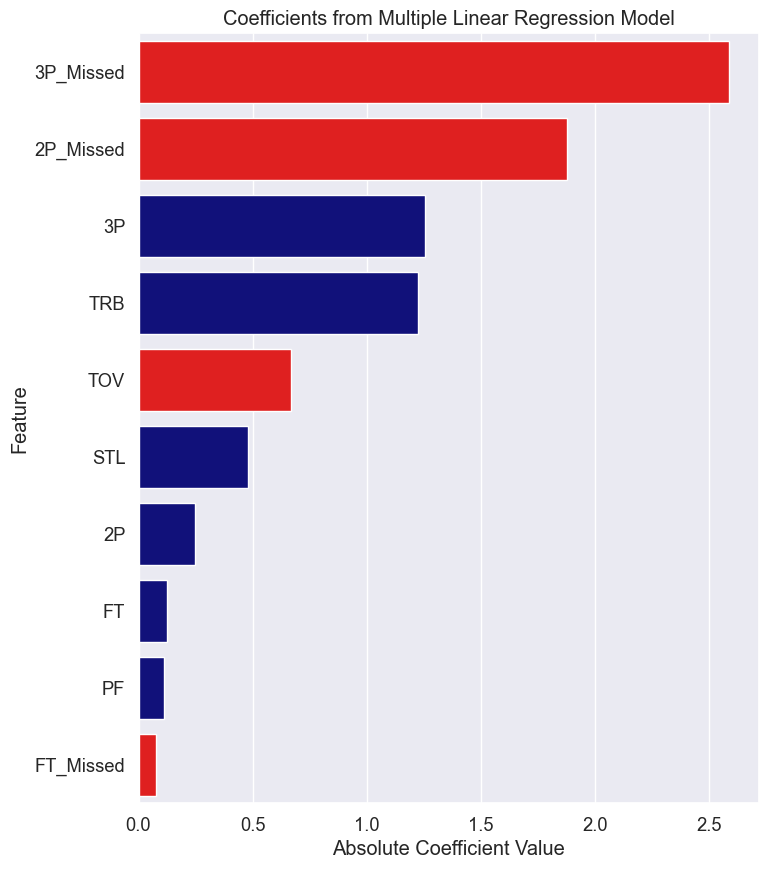

In [39]:
# create a DataFrame of coefficients with their names
coef_df = pd.DataFrame({'coef': values, 'coef_name': coef_names})

# create a new column with the absolute value of the coefficients
coef_df['abs_coef'] = np.abs(coef_df['coef'])

# filter out coefficients less than 0.05
coef_df_filtered = coef_df[coef_df.abs_coef >= 0.05]


# sort the dataframe by the absolute coefficient value in descending order
coef_df_filtered_sorted = coef_df_filtered.sort_values(by='abs_coef', ascending=False)

# create a list of colors
colors = ['red' if c < 0 else 'darkblue' for c in coef_df_filtered_sorted['coef']]

# create a bar chart of the coefficients using seaborn
plt.figure(figsize=(8, 10))
sns.barplot(x='abs_coef', y='coef_name', data=coef_df_filtered_sorted, palette=colors, order=coef_df_filtered_sorted['coef_name'])

# add axis labels and a title
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients from Multiple Linear Regression Model')

plt.show()


In [40]:
list(coef_df_filtered_sorted['coef_name'])

['3P_Missed',
 '2P_Missed',
 '3P',
 'TRB',
 'TOV',
 'STL',
 '2P',
 'FT',
 'PF',
 'FT_Missed']

## Model 2: Polynomial Regression

In [41]:
modelDf

,Season,W/L%,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,W,L,GB,PS/G,PA/G,SRS,3P_Missed,2P_Missed,FG_Missed,FT_Missed
0,1980.0,0.744,82.0,19880.0,3617.0,7387.0,0.490,162.0,422.0,0.384,...,61.0,21.0,0.0,113.5,105.7,7.37,260.0,3510.0,3770.0,542.0
1,1980.0,0.732,82.0,19880.0,3898.0,7368.0,0.529,20.0,100.0,0.200,...,60.0,22.0,0.0,115.1,109.2,5.40,80.0,3390.0,3470.0,470.0
2,1980.0,0.720,82.0,19855.0,3523.0,7156.0,0.492,27.0,125.0,0.216,...,59.0,23.0,2.0,109.1,104.9,4.04,98.0,3535.0,3633.0,555.0
3,1980.0,0.683,82.0,19830.0,3554.0,7565.0,0.470,59.0,189.0,0.312,...,56.0,26.0,4.0,108.5,103.8,4.24,130.0,3881.0,4011.0,523.0
4,1980.0,0.671,82.0,19755.0,3570.0,7235.0,0.493,68.0,280.0,0.243,...,55.0,27.0,5.0,111.1,107.5,3.25,212.0,3453.0,3665.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,2020.0,0.303,66.0,15965.0,2595.0,5658.0,0.459,791.0,2157.0,0.367,...,20.0,46.0,32.5,107.2,110.8,-4.38,1366.0,1697.0,3063.0,379.0
1130,2020.0,0.299,67.0,16280.0,2723.0,6067.0,0.449,805.0,2416.0,0.333,...,20.0,47.0,21.0,111.8,119.7,-7.71,1611.0,1733.0,3344.0,329.0
1131,2020.0,0.297,64.0,15560.0,2586.0,5865.0,0.441,853.0,2540.0,0.336,...,19.0,45.0,22.5,113.3,117.5,-4.02,1687.0,1592.0,3279.0,401.0
1132,2020.0,0.292,65.0,15725.0,2619.0,5715.0,0.458,727.0,2070.0,0.351,...,19.0,46.0,33.0,106.9,114.8,-7.77,1343.0,1753.0,3096.0,313.0


In [42]:
y = modelDf.loc[:, 'W']

In [43]:
XpolyDf = scaledDf.loc[:, ['3P_Missed',
 '2P_Missed',
 '3P',
 'TRB',
 'TOV',
 'STL',
 '2P',
 'FT',
 'PF',
 'FT_Missed']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(XpolyDf, y, test_size=0.2, random_state=42)


In [45]:
# Create polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(X_train)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y_train)

# Predict the output for new input
x_test_poly = poly_features.transform(X_test)
y_pred = model.predict(x_test_poly)

In [46]:
def printStats():
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", rmse)

    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)

In [47]:
printStats()

Mean Absolute Error: 4.240442280959783
Mean Squared Error: 28.873127128540578
Root Mean Squared Error: 5.373372044493157
R-squared Score: 0.8082212584144289


## Model 3: Bayesian Regression

In [48]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Create Bayesian regression model
bayesian_model = BayesianRidge(
#     alpha_1 = 1e-06,
#     alpha_2 = 0.1,
#     compute_score = True,
#     lambda_1 = 0.1,
#     lambda_2 = 0.1,
#     n_iter = 70,
#     tol = 0.1
)

# Fit the model to the training data
bayesian_model.fit(X_train, y_train)

# Predict the output for the test set
y_pred = bayesian_model.predict(X_test)

# Evaluate the model using metrics such as RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

printStats()


Mean Absolute Error: 4.471962296732637
Mean Squared Error: 32.09231400866107
Root Mean Squared Error: 5.665007856010535
R-squared Score: 0.7868390365979347


In [49]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

# # Create Bayesian regression model
# bayesian_model = BayesianRidge()

# # Define the hyperparameters to tune
# param_grid = {
#     'alpha_1': [1e-6, 1e-4, 1e-2],
#     'alpha_2': [1e-6, 1e-4, 1e-2, 0.1],
#     'lambda_1': [1e-6, 1e-4, 1e-2, 0.1],
#     'lambda_2': [1e-6, 1e-4, 1e-2, 0.1],
#     'n_iter': [70, 100, 200],
#     'tol': [1e-6, 1e-4, 1e-2, 0.1],
#     'compute_score': [True, False]
# }

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(bayesian_model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# print("Best Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")


KeyboardInterrupt: 

## Model 4: Support Vector Regression

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

for i in range(1, 10):
    # Create an SVR model
    svr = SVR(kernel='linear', C=60, epsilon=i)

    # Fit the model to the training data
    svr.fit(X_train, y_train)

    # Predict the output for the test set
    y_pred = svr.predict(X_test)
    
    print(f'\n---------------\nepsilon = {i}')

    printStats()



---------------
epsilon = 1
Mean Absolute Error: 4.448312819492835
Mean Squared Error: 32.17691055343126
Root Mean Squared Error: 5.672469528647224
R-squared Score: 0.7862771362943657

---------------
epsilon = 2
Mean Absolute Error: 4.463310726957702
Mean Squared Error: 32.49491997311489
Root Mean Squared Error: 5.70043156025181
R-squared Score: 0.7841648799375197

---------------
epsilon = 3
Mean Absolute Error: 4.4646480331129546
Mean Squared Error: 32.18552581666901
Root Mean Squared Error: 5.673228870464245
R-squared Score: 0.7862199126921279

---------------
epsilon = 4
Mean Absolute Error: 4.543047101683941
Mean Squared Error: 32.52096910176685
Root Mean Squared Error: 5.702715940827392
R-squared Score: 0.7839918585294112

---------------
epsilon = 5
Mean Absolute Error: 4.518916913931688
Mean Squared Error: 32.11207898291016
Root Mean Squared Error: 5.666752066476013
R-squared Score: 0.7867077552901607

---------------
epsilon = 6
Mean Absolute Error: 4.576134520940852
Mean Sq

In [68]:
# Create an SVR model
svr = SVR(kernel='linear', C=60, epsilon=1)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predict the output for the test set
y_pred = svr.predict(X_test)

print(f'\n---------------\nepsilon = {i}')

printStats()


---------------
epsilon = 9
Mean Absolute Error: 4.448312819492835
Mean Squared Error: 32.17691055343126
Root Mean Squared Error: 5.672469528647224
R-squared Score: 0.7862771362943657
